In [68]:
import numpy as np
!pip install pyod
import pyod.utils.data as pyod
import matplotlib.pyplot as pyplot

In [75]:
# Ex.1


X_train, X_test, y_train, y_test = pyod.generate_data(n_train=400, n_test=100, n_features=2 ,contamination=0.1)

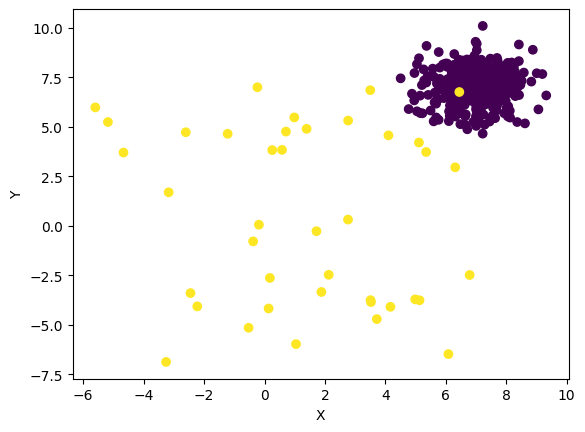

In [76]:
pyplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()

In [77]:
# Ex.2


from pyod.models.knn import KNN
knn_model = KNN(contamination=0.1)
knn_model.fit(X_train)
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, roc_curve, balanced_accuracy_score
print(confusion_matrix(train_pred, y_train))

print ("------------------------------------------")

print(confusion_matrix(y_test, test_pred))

print ("------------------------------------------")

print(balanced_accuracy_score(y_test, test_pred))

[[359   3]
 [  1  37]]
------------------------------------------
[[90  0]
 [ 0 10]]
------------------------------------------
1.0


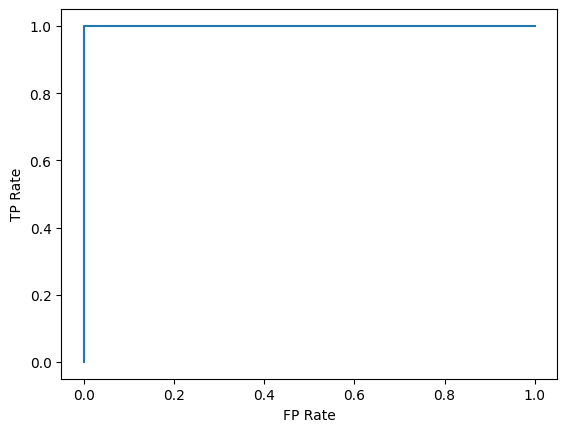

In [79]:
roc_curve_1 = roc_curve(y_test, test_pred)
pyplot.plot(roc_curve_1[0], roc_curve_1[1])
pyplot.xlabel('FP Rate')
pyplot.ylabel('TP Rate')
pyplot.show()

[[225 135]
 [  1  39]]
------------------------------------------
[[48 42]
 [ 0 10]]
------------------------------------------
0.7666666666666666


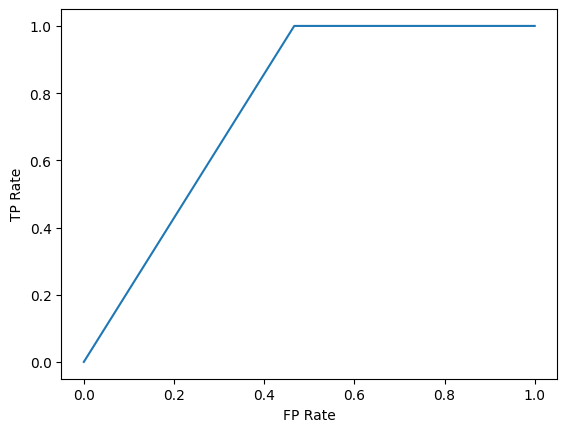

In [80]:
knn_model_2 = KNN(contamination=0.5)
knn_model_2.fit(X_train)
train_pred_2 = knn_model_2.predict(X_train)
test_pred_2 = knn_model_2.predict(X_test)

print(confusion_matrix(y_train, train_pred_2))

print ("------------------------------------------")

print(confusion_matrix(y_test, test_pred_2))

print ("------------------------------------------")

print(balanced_accuracy_score(y_test, test_pred_2))

roc_curve_2 = roc_curve(y_test, test_pred_2)
pyplot.plot(roc_curve_2[0], roc_curve_2[1])
pyplot.xlabel('FP Rate')
pyplot.ylabel('TP Rate')
pyplot.show()

In [81]:
# Ex.3


X_train, X_test, y_train, y_test = pyod.generate_data(n_train=1000, n_test=0, n_features=1 ,contamination=0.1)

In [82]:
z_scores = (X_train[:, 0] - np.mean(X_train[:, 0])) / np.std(X_train[:, 0])
#print(z_scores)
z_scores_threshold = np.quantile(np.abs(z_scores), 1 - 0.1)
print(z_scores_threshold)
print ("------------------------------------------")
y_pred = np.where(np.abs(z_scores) > z_scores_threshold, 1, 0)

#print(y_train.shape)
#print(y_pred.shape)
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_train, y_pred))

1.6211488206448343
------------------------------------------
0.4444444444444444


In [83]:
# Ex.4

np.random.seed(69)

mean = np.array([1, 2, 3])
cov_matrix = np.array([
    [4, -2, 0],
    [-2, 3, 1],
    [0, 1, 5]
])

x = np.random.randn(1000, 3)

L = np.linalg.cholesky(cov_matrix)

y = (L @ x.T).T + mean

In [84]:
print(y.shape)
print(np.mean(y, axis=0))
print(np.cov(y.T))

(1000, 3)
[0.87439945 2.11649384 2.96808848]
[[ 4.15581166 -2.12756157  0.1471948 ]
 [-2.12756157  3.1340547   0.98620154]
 [ 0.1471948   0.98620154  5.03697667]]


In [85]:
idx_out = np.random.choice(1000, 100, replace=False)

y_true = np.zeros(1000)
y_true[idx_out] = 1

z_scores = np.zeros_like(y)
for i in range(3):
    z_scores[:, i] = (y[:, i] - np.mean(y[:, i])) / np.std(y[:, i])

max_z_scores = np.max(np.abs(z_scores), axis=1)
threshold_z = np.quantile(max_z_scores, 1 - 0.1)

In [86]:
print(threshold_z)
print("------------------------------------------")

y_pred = np.where(max_z_scores > threshold_z, 1, 0)

#print(y_true.shape)
#print(y_pred.shape)
print(balanced_accuracy_score(y_true, y_pred))

2.089950511390541
------------------------------------------
0.5055555555555555
